<a href="https://colab.research.google.com/github/Clint07-datascientist/AgroInsightX_ML_Project/blob/main/Summative_Intro_to_ml_Clinton_Pikita_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [5]:
import sys
print(sys.executable)

c:\Users\ELOHOME\AgroInsightX_ML\AgroInsightX_ML_Project\.venv_maize\Scripts\python.exe


In [7]:
#Import Necessary Libraries
import os
import joblib
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from PIL import Image # For classical ML image loading
import matplotlib.pyplot as plt # For visualization
from sklearn.preprocessing import StandardScaler # For classical ML data scaling

# The Dataset
> ***Brief Description:***
State the Problem and A short Description of the data


In [24]:
#TO DO: Load Data (Seprate into: Train, Validation and test sets)
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32

# Defined the paths to the training and validation sets
train_set = 'data/train_data'
validation_set = 'data/validation_data'

# Load the training dataset from the 'train' folder
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_set,
    label_mode='categorical',
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

# Load the validation dataset from the 'val' folder
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_set,
    label_mode='categorical',
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

Found 348 files belonging to 7 classes.
Found 349 files belonging to 7 classes.


Found 7 classes.
Class Names: ['Fall_Armyworm', 'Grasshoper', 'Healthy_Maize', 'Leaf_Beetle', 'Leaf_Blight', 'Leaf_Spot', 'Streak_Virus']


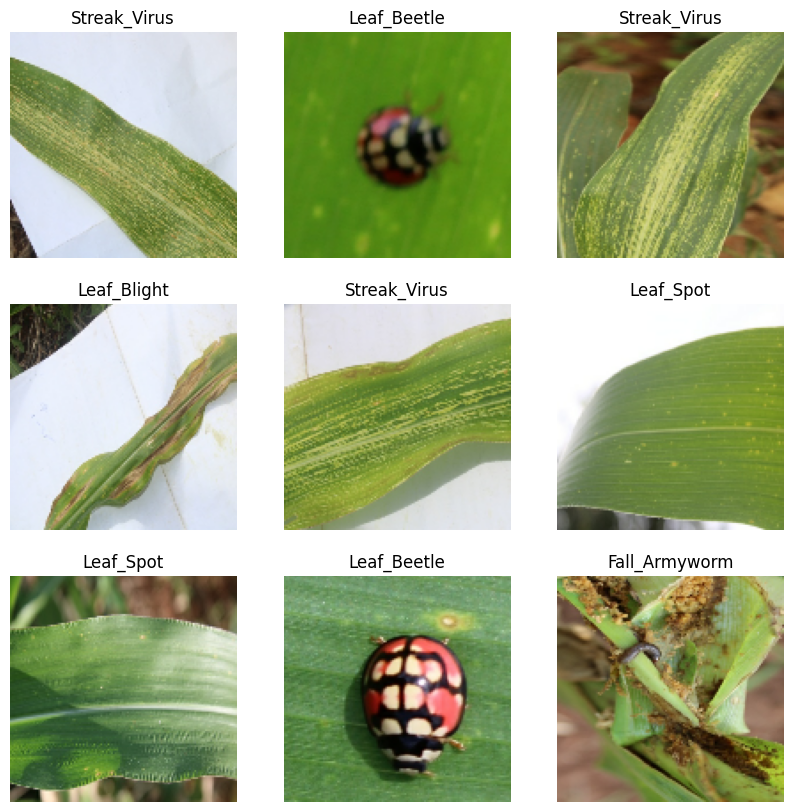

In [25]:
# Verify the data by plotting images
class_names = train_dataset.class_names
print(f"Found {len(class_names)} classes.")
print("Class Names:", class_names)

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[tf.argmax(labels[i])])
    plt.axis("off")
plt.show()

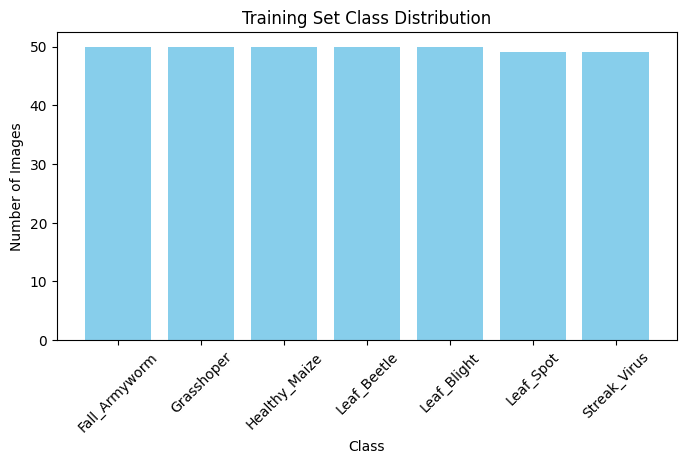

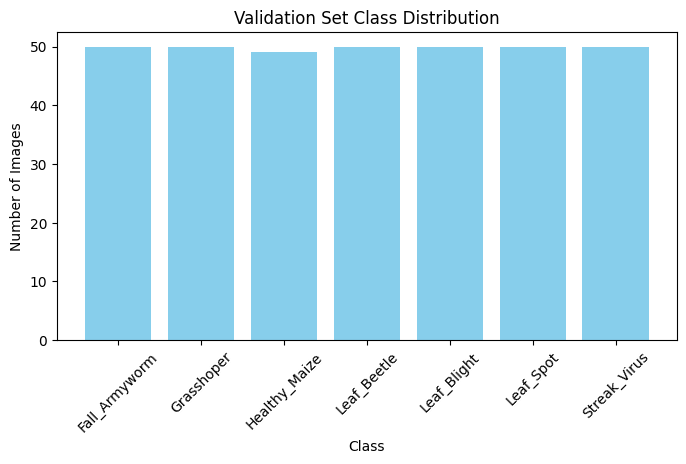

In [26]:
import os
import matplotlib.pyplot as plt

# Paths to your data folders
train_dir = 'data/train_data'
val_dir = 'data/validation_data'

def plot_class_distribution(data_dir, title):
    class_counts = {}
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            count = len([f for f in os.listdir(class_path) if f.endswith('.jpg')])
            class_counts[class_name] = count
    # Plot
    plt.figure(figsize=(8,4))
    plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)
    plt.show()

# Plot for train and validation sets
plot_class_distribution(train_dir, "Training Set Class Distribution")
plot_class_distribution(val_dir, "Validation Set Class Distribution")

In [27]:
from PIL import Image
import numpy as np

def check_image_shapes(data_dir, num_samples=100):
    shapes = []
    corrupt_files = []
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            files = [f for f in os.listdir(class_path) if f.endswith('.jpg')]
            for f in files[:num_samples]:  # Limit to first 100 images per class for speed
                img_path = os.path.join(class_path, f)
                try:
                    with Image.open(img_path) as img:
                        shapes.append(np.array(img).shape)
                except Exception as e:
                    corrupt_files.append(img_path)
    unique_shapes = set(shapes)
    print(f"Unique image shapes in {data_dir}: {unique_shapes}")
    if corrupt_files:
        print(f"Skipped {len(corrupt_files)} corrupt images.")
        # Optionally print the file names:
        # print("Corrupt files:", corrupt_files)

# Check for train and validation sets
check_image_shapes(train_dir)
check_image_shapes(val_dir)

Unique image shapes in data/train_data: {(400, 400, 3)}
Skipped 1 corrupt images.
Unique image shapes in data/validation_data: {(400, 400, 3)}
Skipped 1 corrupt images.


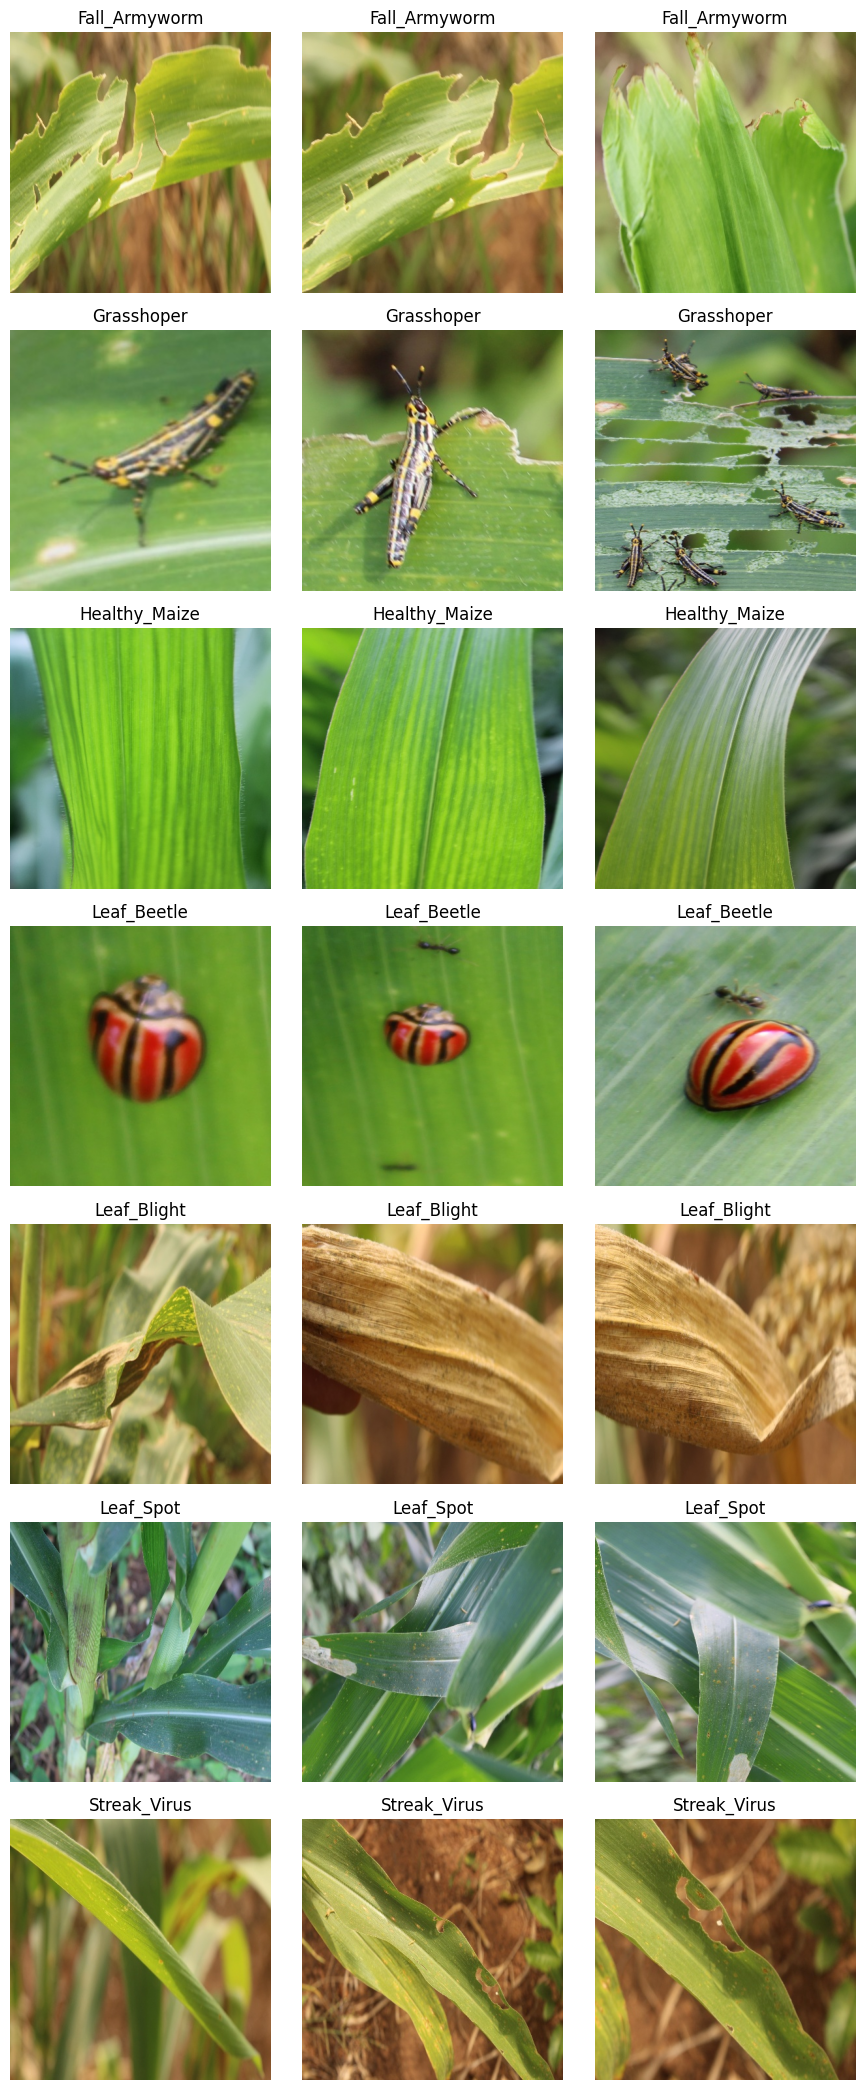

In [28]:
def plot_sample_images(data_dir, num_samples=3):
    class_names = os.listdir(data_dir)
    plt.figure(figsize=(num_samples*3, len(class_names)*3))
    for i, class_name in enumerate(class_names):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            files = [f for f in os.listdir(class_path) if f.endswith('.jpg')]
            for j in range(num_samples):
                img_path = os.path.join(class_path, files[j])
                img = Image.open(img_path)
                plt.subplot(len(class_names), num_samples, i*num_samples + j + 1)
                plt.imshow(img)
                plt.title(class_name)
                plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_sample_images(train_dir, num_samples=3)

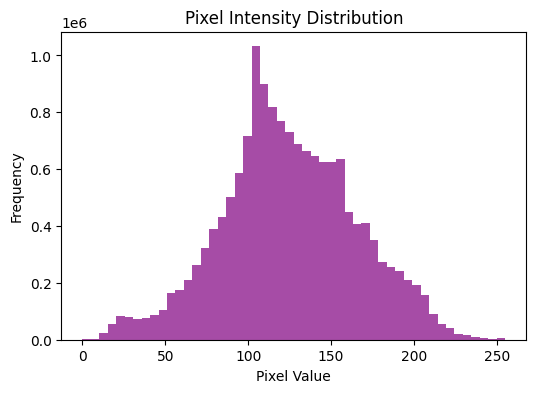

In [29]:
def plot_pixel_distribution(data_dir, num_images=100):
    pixel_values = []
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            files = [f for f in os.listdir(class_path) if f.endswith('.jpg')]
            for f in files[:num_images//len(os.listdir(data_dir))]:
                img_path = os.path.join(class_path, f)
                img = Image.open(img_path).convert('L')  # Convert to grayscale for simplicity
                pixel_values.extend(np.array(img).flatten())
    plt.figure(figsize=(6,4))
    plt.hist(pixel_values, bins=50, color='purple', alpha=0.7)
    plt.title('Pixel Intensity Distribution')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

plot_pixel_distribution(train_dir)

In [31]:
def check_corrupt_images(data_dir):
    corrupt_files = []
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            files = [f for f in os.listdir(class_path) if f.endswith('.jpg')]
            for f in files:
                img_path = os.path.join(class_path, f)
                try:
                    img = Image.open(img_path)
                    img.verify()  # Will not load the image, but will check for corruption
                except Exception as e:
                    corrupt_files.append(img_path)
    print(f"Found {len(corrupt_files)} corrupt images.")
    if corrupt_files:
        print("Corrupt files:", corrupt_files)

check_corrupt_images(train_dir)

Found 0 corrupt images.


#SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```
> <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*v1ohAG82xmU6WGsG2hoE8g.png" alt="?" style="width:25px"/>




#Task: Define a function that creates models without and With specified Optimization techniques


In [32]:
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adagrad
from tensorflow.keras.callbacks import EarlyStopping

def define_model(optimizer_name='adam', regularization=None, early_stopping=False, dropout=0.0, learning_rate=0.001, input_shape=(128,128,3), num_classes=7):
    # Regularization
    reg = None
    if regularization == 'l1':
        reg = regularizers.l1(0.01)
    elif regularization == 'l2':
        reg = regularizers.l2(0.01)
    elif regularization == 'l1_l2':
        reg = regularizers.l1_l2(l1=0.01, l2=0.01)
    
    # Model architecture
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    model.add(layers.Conv2D(32, (3,3), activation='relu', kernel_regularizer=reg))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=reg))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    if dropout > 0:
        model.add(layers.Dropout(dropout))
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=reg))
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    # Optimizer
    if optimizer_name == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    elif optimizer_name == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    elif optimizer_name == 'adagrad':
        optimizer = Adagrad(learning_rate=learning_rate)
    else:
        optimizer = Adam(learning_rate=learning_rate)  # default
    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Callbacks
    callbacks = []
    if early_stopping:
        callbacks.append(EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True))
    
    return model, callbacks

In [33]:
# Baseline (no special optimizer, regularization, or early stopping)
model1, cb1 = define_model(optimizer_name='adam', regularization=None, early_stopping=False, dropout=0.0, learning_rate=0.001)

# With different optimizers
model2, cb2 = define_model(optimizer_name='adam', regularization='l2', early_stopping=True, dropout=0.3, learning_rate=0.001)
model3, cb3 = define_model(optimizer_name='rmsprop', regularization='l1', early_stopping=True, dropout=0.3, learning_rate=0.001)
model4, cb4 = define_model(optimizer_name='sgd', regularization='l1_l2', early_stopping=True, dropout=0.3, learning_rate=0.001)
model5, cb5 = define_model(optimizer_name='adagrad', regularization=None, early_stopping=True, dropout=0.3, learning_rate=0.001)

c:\Users\ELOHOME\AgroInsightX_ML\AgroInsightX_ML_Project\.venv_maize\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [22]:
def remove_corrupt_images(data_dir):
    num_removed = 0
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            for fname in os.listdir(class_path):
                if fname.lower().endswith('.jpg'):
                    fpath = os.path.join(class_path, fname)
                    try:
                        with Image.open(fpath) as img:
                            img.verify()  # Will not load the image, but will check for corruption
                    except Exception as e:
                        print(f"Removing corrupt image: {fpath}")
                        os.remove(fpath)
                        num_removed += 1
    print(f"Removed {num_removed} corrupt images from {data_dir}")

# Run for both train and validation directories
remove_corrupt_images('data/train_data')
remove_corrupt_images('data/validation_data')

Removing corrupt image: data/train_data\Streak_Virus\streak virus119_.jpg
Removed 1 corrupt images from data/train_data
Removing corrupt image: data/validation_data\Healthy_Maize\healthy18_.jpg
Removed 1 corrupt images from data/validation_data


In [34]:
history1 = model1.fit(train_dataset, validation_data=validation_dataset, epochs=20, callbacks=cb1)
history2 = model2.fit(train_dataset, validation_data=validation_dataset, epochs=20, callbacks=cb2)
history3 = model3.fit(train_dataset, validation_data=validation_dataset, epochs=20, callbacks=cb3)
history4 = model4.fit(train_dataset, validation_data=validation_dataset, epochs=20, callbacks=cb4)
history5 = model5.fit(train_dataset, validation_data=validation_dataset, epochs=20, callbacks=cb5)

# Plot loss curves
plt.figure(figsize=(12, 6))
plt.plot(history1.history['loss'], label='Adam (no reg/early stop)')
plt.plot(history2.history['loss'], label='Adam (l2 reg)')
plt.plot(history3.history['loss'], label='RMSprop (l1 reg)')
plt.plot(history4.history['loss'], label='SGD (l1_l2 reg)')
plt.plot(history5.history['loss'], label='Adagrad (no reg/early stop)')
plt.title('Loss Curves for Different Models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/20
 8/11 ━━━━━━━━━━━━━━━━━━━━ 2s 715ms/step - accuracy: 0.1497 - loss: 715.0936

InvalidArgumentError: Graph execution error:

Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
jpeg::Uncompress failed. Invalid JPEG data or crop window.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_multi_step_on_iterator_5347]

# Task: Print out the Final Model Accuracy and plot the Loss curve

In [3]:
import matplotlib.pyplot as plt

def loss_curve_plot(history):
    plt.plot(history.history['loss'], 'bo-', label='Training loss')
    plt.plot(history.history['val_loss'], 'r*-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [4]:
# Example: Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20,
    callbacks=callbacks
)

# Print final accuracy
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

# Plot the loss curve
loss_curve_plot(history)

NameError: name 'model' is not defined

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

In [ ]:
#TODO:
model_2 = define_model('Adam', None)
loss_curve_plot(model_2):
#print out confusion matrix and error analysis metrics after the cell

In [ ]:
#TODO:
model_3 = define_model('RMSPop',None)
loss_curve_plot(model_3):
#print out confusion matrix and error analysis metrics after the cell

In [ ]:
#TODO:
model_4 = define_model(None)
loss_curve_plot(model_4):
#print out confusion matrix and error analysis metrics after the cell

#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [ ]:
def make_predictions(model_path, X):

    # Load the model
    model = load_model(None)
    # Make predictions
    predictions = None
    # Convert probabilities to binary labels (0 or 1)

    return predictions

#Modify the code appropriately

In [ ]:
model_path = None
make_predictions(None)

Congratulations!!
